In [26]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd 
import numpy as np

In [27]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [22]:
def create_dataframe(directory):
    image_files = []
    labels = []
    
    class_folders = os.listdir(directory)
    print(f"\nProcessing classes in {directory}: {class_folders}")
    
    for label in class_folders:
        class_path = os.path.join(directory, label)
        if os.path.isdir(class_path):  
            images = os.listdir(class_path)
            print(f"Class '{label}' found with {len(images)} images.")  # Debugging
            
            for image_name in images:
                image_path = os.path.join(class_path, image_name)
                image_files.append(image_path)
                labels.append(label)
    
    return pd.DataFrame({'image': image_files, 'label': labels})     

In [23]:
train = create_dataframe(TRAIN_DIR)
test = create_dataframe(TEST_DIR)


Processing classes in images/train: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Class 'angry' found with 3983 images.
Class 'disgust' found with 436 images.
Class 'fear' found with 4103 images.
Class 'happy' found with 7164 images.
Class 'neutral' found with 4982 images.
Class 'sad' found with 4938 images.
Class 'surprise' found with 3205 images.

Processing classes in images/test: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Class 'angry' found with 960 images.
Class 'disgust' found with 111 images.
Class 'fear' found with 1018 images.
Class 'happy' found with 1825 images.
Class 'neutral' found with 1216 images.
Class 'sad' found with 1139 images.
Class 'surprise' found with 797 images.


In [24]:
print(train.head())


                          image  label
0  images/train\angry\10100.jpg  angry
1  images/train\angry\10105.jpg  angry
2  images/train\angry\10115.jpg  angry
3  images/train\angry\10122.jpg  angry
4  images/train\angry\10142.jpg  angry


In [25]:
import os

TRAIN_DIR = 'images/train'

print("Folders detected in TRAIN_DIR:")
for folder in os.listdir(TRAIN_DIR):
    folder_path = os.path.join(TRAIN_DIR, folder)
    print(f"- {folder} (Contains {len(os.listdir(folder_path))} files)" if os.path.isdir(folder_path) else f"- {folder} (Not a folder)")

Folders detected in TRAIN_DIR:
- angry (Contains 3983 files)
- disgust (Contains 436 files)
- fear (Contains 4103 files)
- happy (Contains 7164 files)
- neutral (Contains 4982 files)
- sad (Contains 4938 files)
- surprise (Contains 3205 files)


In [7]:
print("\nClass Distribution in Training Data:")
print(train['label'].value_counts())


Class Distribution in Training Data:
label
happy       7164
neutral     4982
sad         4938
fear        4103
angry       3983
surprise    3205
disgust      436
Name: count, dtype: int64


In [8]:
from tqdm.notebook import tqdm
from keras.preprocessing.image import load_img, img_to_array

In [9]:
import os

print("Folders detected in TRAIN_DIR:", os.listdir(TRAIN_DIR))

Folders detected in TRAIN_DIR: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [10]:
def extract_features(images, target_size=(48, 48)):
    features = []

    for image in tqdm(images):  
        try:
           
            img = load_img(image, target_size=target_size, color_mode="grayscale")
            img_array = img_to_array(img)  
            img_array /= 255.0  
            features.append(img_array)
        except Exception as e:
            print(f"Error loading image {image}: {e}")

    return np.array(features)

In [11]:
train_features = extract_features(train['image'])
print("Feature shape:", train_features.shape)

  0%|          | 0/28811 [00:00<?, ?it/s]

Feature shape: (28811, 48, 48, 1)


In [12]:
test_features = extract_features(test['image'])
print("Feature shape:", test_features.shape)

  0%|          | 0/7066 [00:00<?, ?it/s]

Feature shape: (7066, 48, 48, 1)


In [28]:
x_train = train_features/255.0
x_test = test_features/255.0

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [31]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [32]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [33]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation = 'relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation = 'relu'))
model.add (MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512,kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(7,activation='softmax'))

C:\Users\Lakshya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [35]:
model.fit(x = x_train, y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.2394 - loss: 1.8380 - val_accuracy: 0.2583 - val_loss: 1.8095
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.2470 - loss: 1.8171 - val_accuracy: 0.2583 - val_loss: 1.8095
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.2481 - loss: 1.8127 - val_accuracy: 0.2583 - val_loss: 1.8087
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.2459 - loss: 1.8135 - val_accuracy: 0.2583 - val_loss: 1.8097
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.2474 - loss: 1.8143 - val_accuracy: 0.2583 - val_loss: 1.8092
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.2520 - loss: 1.8129 - val_accuracy: 0.2583 - val_loss: 1.8090
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 268s 1s/step - accuracy: 0.2495 - loss: 1.8141 - val_accuracy: 0.2583 - val_loss: 1.8102
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 269s 1s/step - accuracy: 0.2501 - loss: 1.8142 - 

In [50]:
model_json = model.to_json()
with open("emotiondetector.json", "w") as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")    

In [51]:
from tensorflow.keras.models import Sequential, model_from_json

In [52]:
with open("facialemotionmodel.json", "r") as json_file:
    model_json = json_file.read()
json_file.close()
model = model_from_json(model_json, custom_objects={"Sequential": Sequential})
model.load_weights("facialemotionmodel.h5")

In [53]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [56]:
def ef(image):
    img = load_img(image,grayscale = True)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [64]:
image = r"C:\Users\Lakshya\facialemotionrecognition(1)\images\train\disgust/299.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
model prediction is disgust


In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
model prediction is disgust


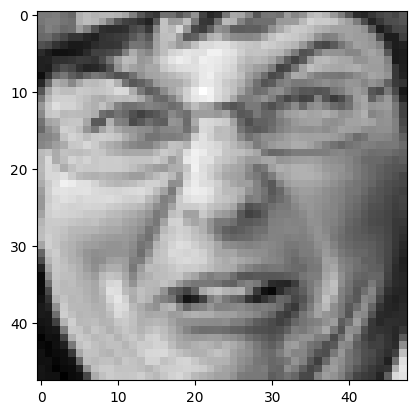

In [67]:
image = r"C:\Users\Lakshya\facialemotionrecognition(1)\images\train\disgust/299.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap= 'gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
model prediction is sad


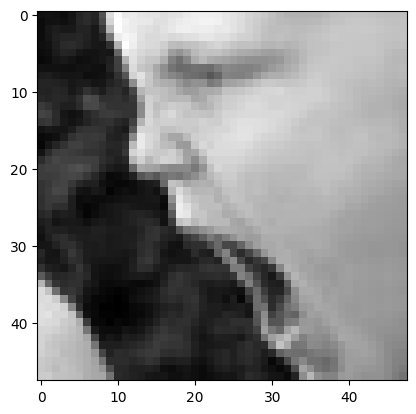

In [68]:
image = r"C:\Users\Lakshya\facialemotionrecognition(1)\images\train\angry/68.jpg"
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap= 'gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
model prediction is surprise


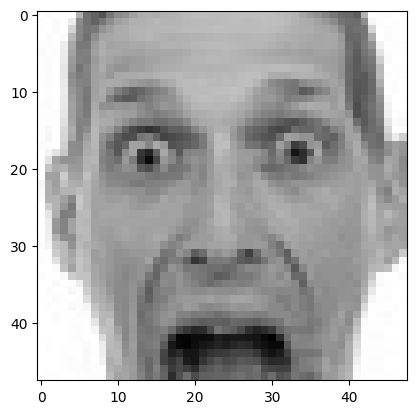

In [69]:
image = r"C:\Users\Lakshya\facialemotionrecognition(1)\images\train\fear/9.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap= 'gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
model prediction is happy


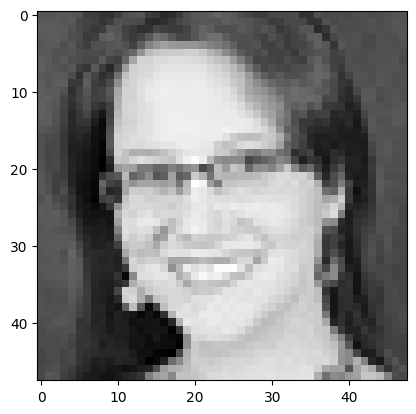

In [70]:
image = r"C:\Users\Lakshya\facialemotionrecognition(1)\images\train\happy/7.jpg"
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap= 'gray')

original image is of neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
model prediction is neutral


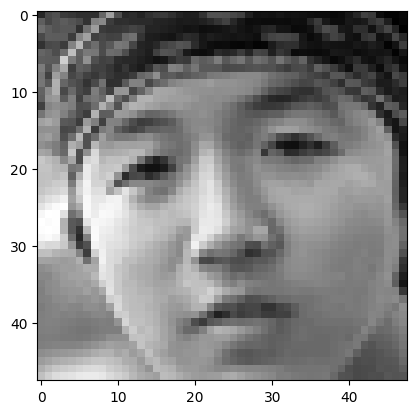

In [71]:
image = r"C:\Users\Lakshya\facialemotionrecognition(1)\images\train\neutral/11.jpg"
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap= 'gray')

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
model prediction is sad


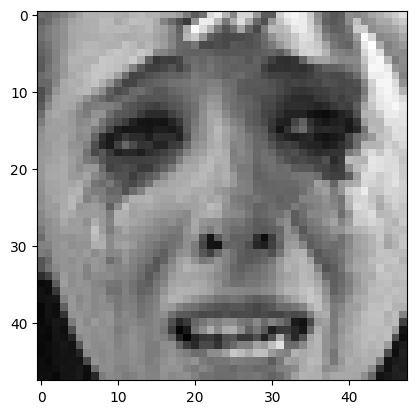

In [72]:
image = r"C:\Users\Lakshya\facialemotionrecognition(1)\images\train\sad/54.jpg"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap= 'gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
model prediction is fear


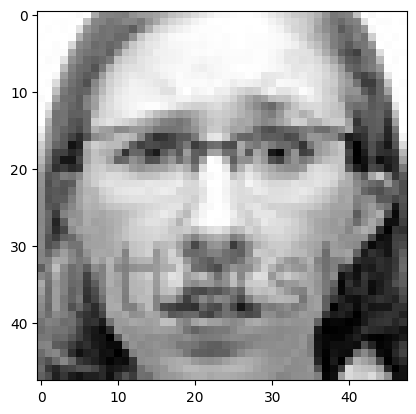

In [74]:
image = r"C:\Users\Lakshya\facialemotionrecognition(1)\images\train\surprise/132.jpg"
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48), cmap= 'gray')